In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/AI/nhandangmonan/train"
valid_image_files_path = "/content/drive/MyDrive/AI/nhandangmonan/validation"

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
label=['banhmi','banhxeo','bapnuong','chagio','comchien',
     'galagiang','goicuon','pho','thitnuong','xoi']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')

Found 200 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model=tf.keras.models.Sequential()

# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))

# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  


 
  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))
# lớp output
model.add(Dense(10, activation=tf.nn.softmax))

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:

EPOCHS=25
history=model.fit(
    train_generator,
    batch_size=32,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
)

Epoch 1/25
7/7 [==============================] - 67s 8s/step - loss: 5.0891 - acc: 0.0750 - val_loss: 2.2981 - val_acc: 0.1000
Epoch 2/25
7/7 [==============================] - 1s 194ms/step - loss: 2.3191 - acc: 0.1050 - val_loss: 2.2796 - val_acc: 0.1400
Epoch 3/25
7/7 [==============================] - 1s 194ms/step - loss: 2.1484 - acc: 0.2200 - val_loss: 2.1434 - val_acc: 0.1800
Epoch 4/25
7/7 [==============================] - 1s 190ms/step - loss: 1.8023 - acc: 0.3800 - val_loss: 1.8136 - val_acc: 0.3000
Epoch 5/25
7/7 [==============================] - 1s 172ms/step - loss: 1.4347 - acc: 0.5800 - val_loss: 2.1216 - val_acc: 0.2800
Epoch 6/25
7/7 [==============================] - 1s 179ms/step - loss: 1.0220 - acc: 0.7000 - val_loss: 2.0873 - val_acc: 0.2000
Epoch 7/25
7/7 [==============================] - 1s 169ms/step - loss: 0.6924 - acc: 0.7550 - val_loss: 2.5156 - val_acc: 0.3400
Epoch 8/25
7/7 [==============================] - 1s 167ms/step - loss: 0.4203 - acc: 0.8700

<Figure size 432x288 with 0 Axes>

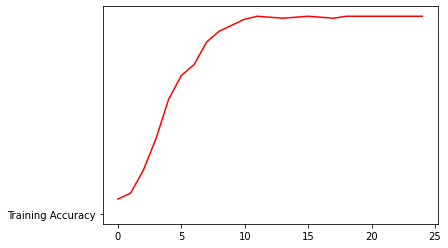

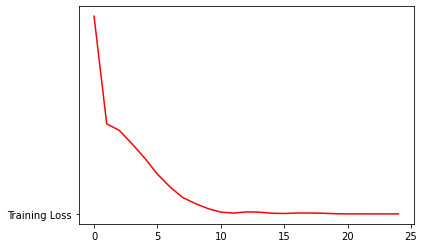

<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.python.util.tf_export import InvalidSymbolNameError
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
acc = history.history['acc']
loss=history.history['loss']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',"Training Accuracy")
plt.figure()
plt.plot(epochs,loss,'r',"Training Loss")
plt.figure()

In [ ]:
score = model.evaluate(train_generator,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.00011773125152103603
Độ chính xác  1.0


Saving cc1.jpg to cc1.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Dự đoán:  comchien


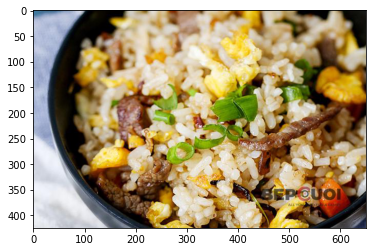

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/'+fn
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving xoi1.jpg to xoi1.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Dự đoán:  xoi


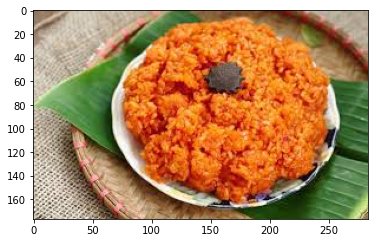

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving tn1.jpg to tn1.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
Dự đoán:  thitnuong


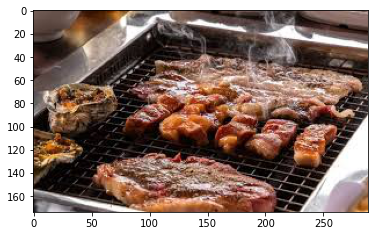

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])

Saving bm2.jpg to bm2.jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Dự đoán:  banhmi


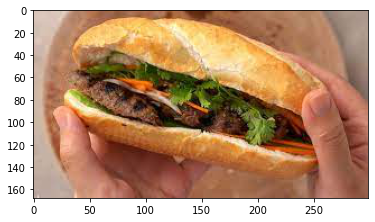

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded=files.upload()

for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Dự đoán: ', label[np.argmax(y_predict)])